In [147]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [149]:
df = pd.read_csv('iris.csv', header=None)
df.columns = ['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이','품종']
df.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
df2 = df.copy()

In [153]:
df2['품종'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [155]:
# 품종을 백터화
df2['품종'] = df2['품종'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2})
df2.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침 길이  150 non-null    float64
 1   꽃받침 넓이  150 non-null    float64
 2   꽃잎 길이   150 non-null    float64
 3   꽃잎 넓이   150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [159]:
# x = df2[['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이']]
x = df2.drop(['품종'], axis=1) # 독립 변수
y = df2['품종']                # 종속 변수
x.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [161]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(120, 4) (30, 4) (120,) (30,)


In [163]:
# 정규표준화
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)  # text_x에는 영항이 없음
test_x = scaler.transform(test_x)

### 정규화 비교
#### StandardScaler
- 변환 방식: 평균 0, 표준 편차 1
- 이상치 영향:    덜 받음
- 분포 형태:    유지

#### MinMaxScaler
- 변환 방식: 지정된 범위 (0~1)  
- 이상치 영향: 민감  
- 분포 형태: 변경 가능

#### 어떤 방법을 선택해야 할까요?

* 데이터의 특성과 분포, 그리고 사용할 모델을 고려하여 선택해야 합니다.
* 일반적으로 StandardScaler가 더 많이 사용됩니다. 특히, 데이터의 분포를 유지하고 이상치의 영향을 줄이고 싶을 때 적합합니다.
* MinMaxScaler는 데이터를 특정 범위로 제한하고 싶을 때 유용합니다. 예를 들어, 이미지 데이터를 0과 1 사이로 스케일링하는 경우에 사용됩니다.

In [166]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(120, 4) (30, 4) (120,) (30,)


In [168]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax')
])

In [170]:
# 인공신경망을 컴파일 합니다.
# binary_crossentropy : 이항 분류
# categorical_crossentropy " 다항 분류
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [172]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [174]:
# 인공신경망을 학습시킵니다.
print('*********** Training start *********')
EPOCHS = 100
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_x, train_y, epochs=EPOCHS, validation_data=(test_x,test_y), callbacks=[early_stop])

*********** Training start *********
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6408 - loss: 0.9977 - val_accuracy: 0.6333 - val_loss: 0.9277
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6288 - loss: 0.9086 - val_accuracy: 0.6667 - val_loss: 0.8246
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6948 - loss: 0.8085 - val_accuracy: 0.8333 - val_loss: 0.7381
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7383 - loss: 0.7512 - val_accuracy: 0.8000 - val_loss: 0.6686
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7429 - loss: 0.6876 - val_accuracy: 0.8000 - val_loss: 0.6127
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7721 - loss: 0.6239 - val_accuracy: 0.7667 - val_loss: 0.5672
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8056 - loss: 0.5750 - val_accuracy: 0.8000 - val_loss: 0.5302
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7442 - loss: 0.56

In [131]:
pred = model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


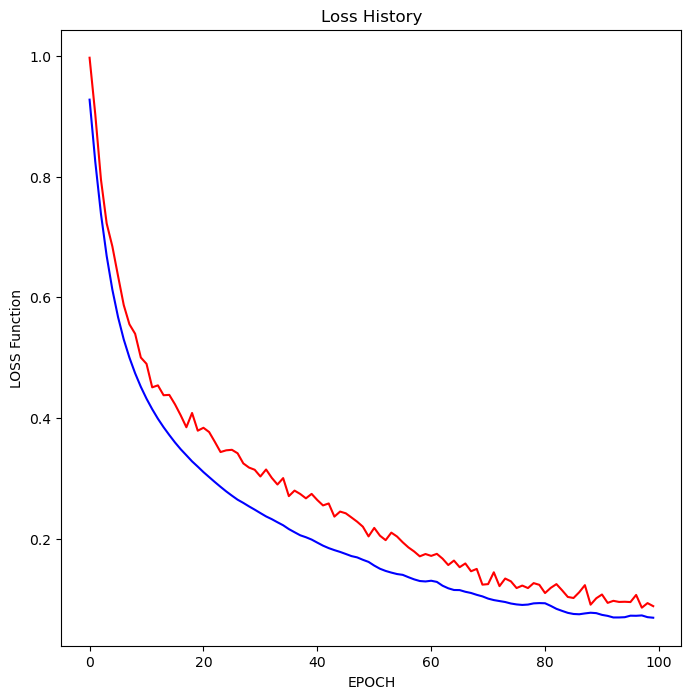

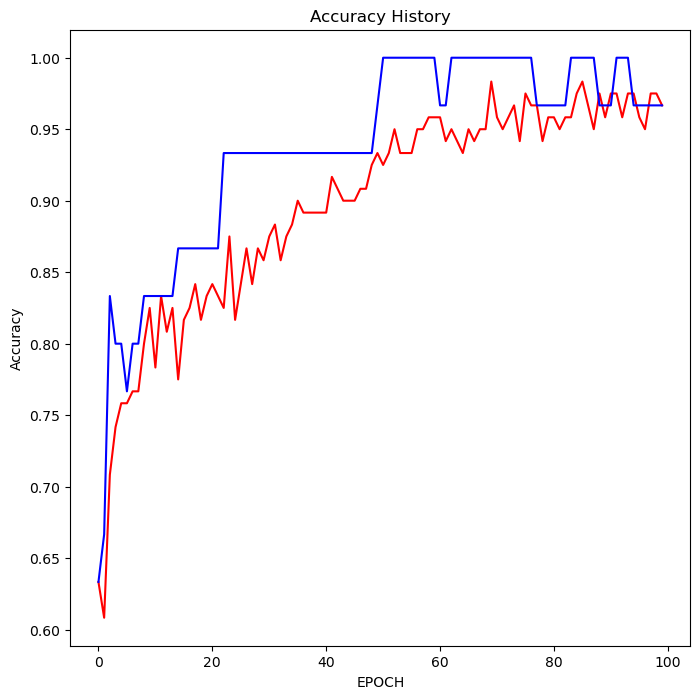

In [177]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [181]:
# iris 유형 매핑
iris_types = {0:'setosa',1:'versicolor',2:'virginica'}

# 예측 결과에서 가장 높은 확률의 인덱스를 찾고 매핑
predicted_classes = np.argmax(pred, axis=1)
predicted_iris_types = [iris_types[i] for i in predicted_classes]

correct_iris_types = [iris_types[i] for i in test_y]

# 결과 출력
list(zip(correct_iris_types,predicted_iris_types))

[('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('virginica', 'virginica'),
 ('setosa', 'setosa'),
 ('setosa', 'setosa')]